In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [206]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [207]:
df.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


In [209]:
df.shape

(200, 5)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [211]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [212]:
X = df.iloc[:,3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [213]:
#within cluster sum of squares
#elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

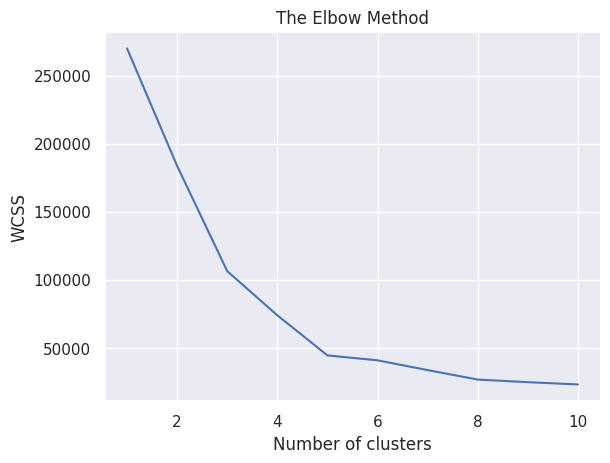

In [216]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [217]:
#number of clusters = 5

In [218]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0 )
Y = kmeans.fit_predict(X)
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

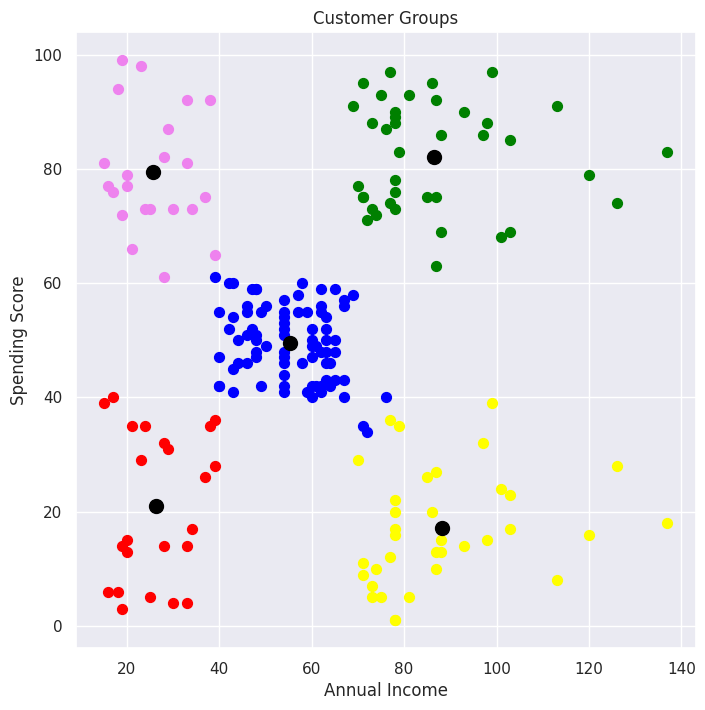

In [219]:
# visualization
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='blue', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='red', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='violet', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [220]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76


In [221]:
df.dtypes

,0
CustomerID,int64
Gender,int64
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [222]:
gender_count = df['Gender'].value_counts(dropna = False)
gender_count

,count
Gender,
0,112
1,88


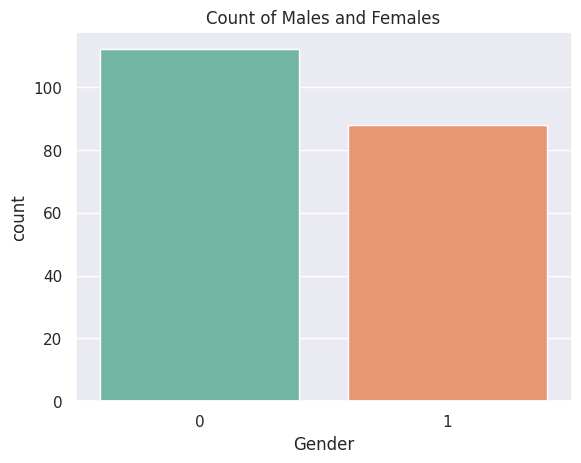

In [223]:
sns.countplot(data=df, x="Gender", palette="Set2")
plt.title("Count of Males and Females")
plt.show()

In [224]:
gender_income = df[['Gender', 'Annual Income (k$)']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual Income (k$)
0,0,59.250000
1,1,62.227273


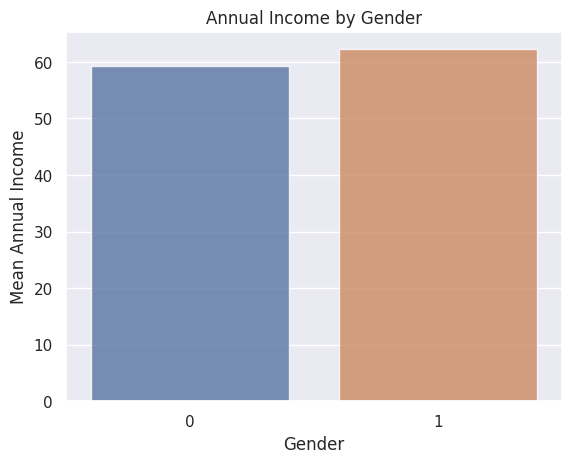

In [225]:
sns.barplot(x='Gender', y='Annual Income (k$)',data=gender_income, alpha = 0.8, palette="deep")
plt.title('Annual Income by Gender')
plt.ylabel('Mean Annual Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [226]:
gender_spending = df[['Gender', 'Spending Score (1-100)']].groupby('Gender', as_index = False).mean()
gender_spending

,Gender,Spending Score (1-100)
0,0,51.526786
1,1,48.511364


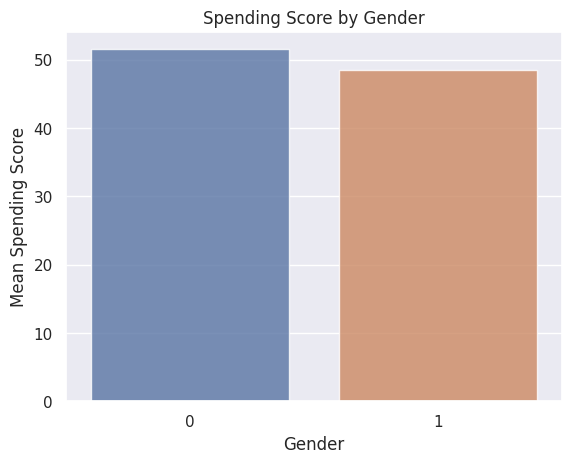

In [227]:
sns.barplot(x='Gender', y='Spending Score (1-100)',data=gender_spending, alpha = 0.8, palette="deep")
plt.title('Spending Score by Gender')
plt.ylabel('Mean Spending Score', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [228]:
gender_age = df[['Gender', 'Age']].groupby('Gender', as_index = False).mean()
gender_age

,Gender,Age
0,0,38.098214
1,1,39.806818


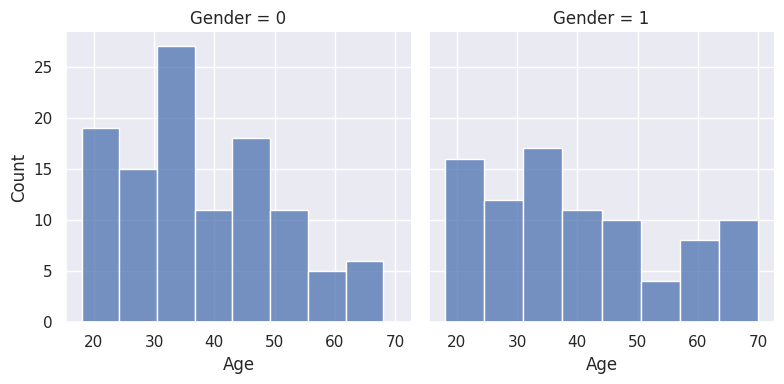

In [229]:
g = sns.FacetGrid(df, col="Gender", height=4)
g.map(sns.histplot, "Age")
plt.show()

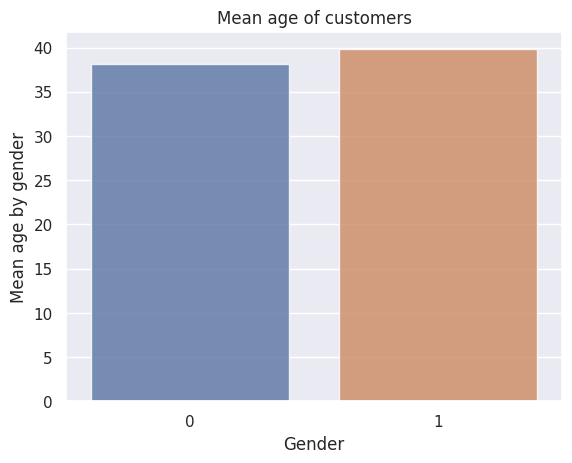

In [230]:
sns.barplot(x='Gender', y='Age',data=gender_age, alpha = 0.8, palette="deep")
plt.title('Mean age of customers')
plt.ylabel('Mean age by gender', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [231]:
gender_k = df.groupby('Gender')[['Age', 'Annual Income (k$)']].mean()
gender_k

,Age,Annual Income (k$)
Gender,,
0,38.098214,59.250000
1,39.806818,62.227273


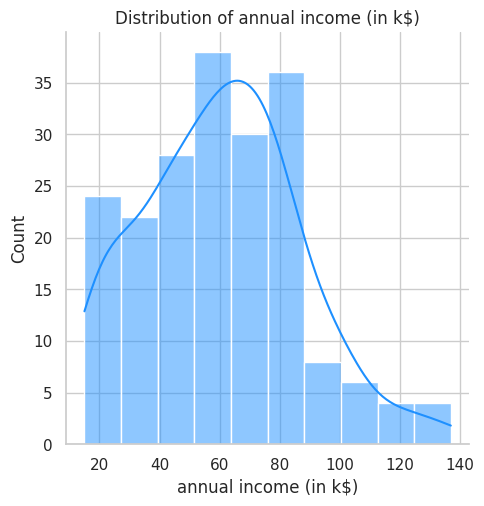

In [232]:
sns.set(style="whitegrid")
sns.displot(df["Annual Income (k$)"], kde=True, color="dodgerblue")

plt.title("Distribution of annual income (in k$)")
plt.xlabel("annual income (in k$)")
plt.ylabel("Count")
plt.show()

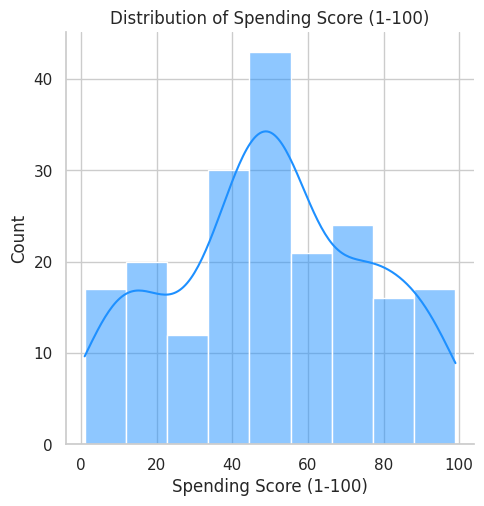

In [233]:
sns.set(style="whitegrid")
sns.displot(df["Spending Score (1-100)"], kde=True, color="dodgerblue")

plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Count")
plt.show()

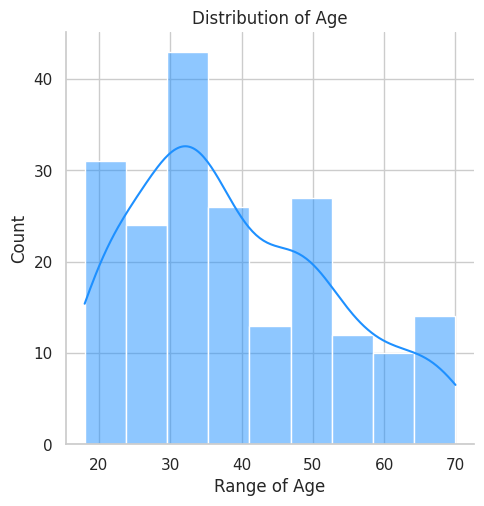

In [234]:
sns.set(style="whitegrid")
sns.displot(df["Age"], kde=True, color="dodgerblue")

plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")
plt.show()

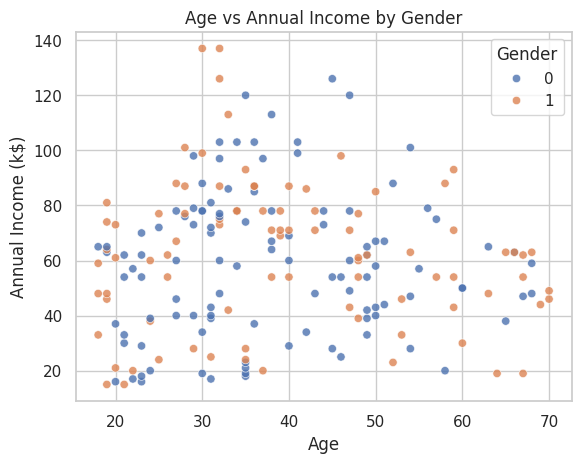

In [235]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue='Gender', alpha=0.8)
plt.title('Age vs Annual Income by Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

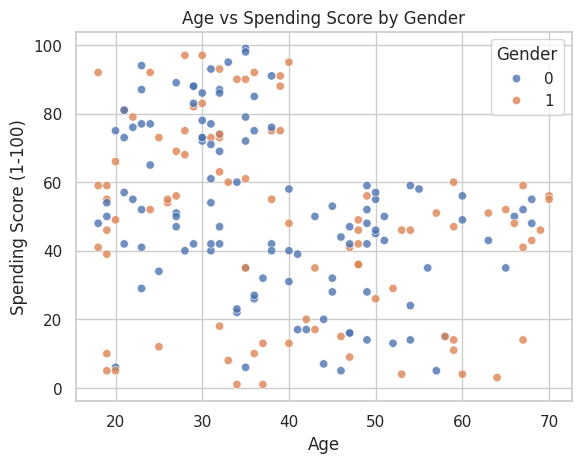

In [236]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Gender', alpha=0.8)
plt.title('Age vs Spending Score by Gender')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

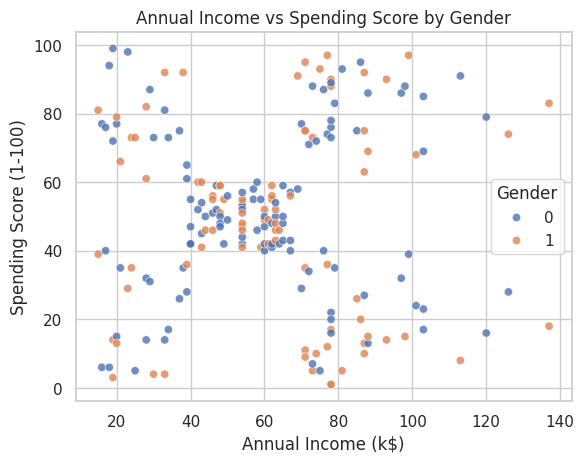

In [237]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', alpha=0.8)
plt.title('Annual Income vs Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [238]:
from sklearn.preprocessing import StandardScaler
features = ['Age', 'Annual Income (k$)']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [239]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [240]:
Q = df.iloc[:,2:4].values
Q

array([[ 19,  15],
       [ 21,  15],
       [ 20,  16],
       [ 23,  16],
       [ 31,  17],
       [ 22,  17],
       [ 35,  18],
       [ 23,  18],
       [ 64,  19],
       [ 30,  19],
       [ 67,  19],
       [ 35,  19],
       [ 58,  20],
       [ 24,  20],
       [ 37,  20],
       [ 22,  20],
       [ 35,  21],
       [ 20,  21],
       [ 52,  23],
       [ 35,  23],
       [ 35,  24],
       [ 25,  24],
       [ 46,  25],
       [ 31,  25],
       [ 54,  28],
       [ 29,  28],
       [ 45,  28],
       [ 35,  28],
       [ 40,  29],
       [ 23,  29],
       [ 60,  30],
       [ 21,  30],
       [ 53,  33],
       [ 18,  33],
       [ 49,  33],
       [ 21,  33],
       [ 42,  34],
       [ 30,  34],
       [ 36,  37],
       [ 20,  37],
       [ 65,  38],
       [ 24,  38],
       [ 48,  39],
       [ 31,  39],
       [ 49,  39],
       [ 24,  39],
       [ 50,  40],
       [ 27,  40],
       [ 29,  40],
       [ 31,  40],
       [ 49,  42],
       [ 33,  42],
       [ 31,

<function matplotlib.pyplot.show(close=None, block=None)>

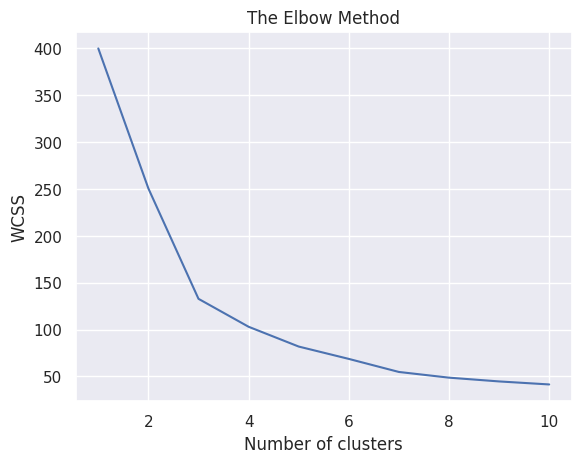

In [241]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [ ]:
#number of clusters=3 for Age and Annual income

In [242]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [247]:
kmeans1 = KMeans(n_clusters=3, init='k-means++', random_state=0 )
L = kmeans1.fit_predict(Q)
L

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

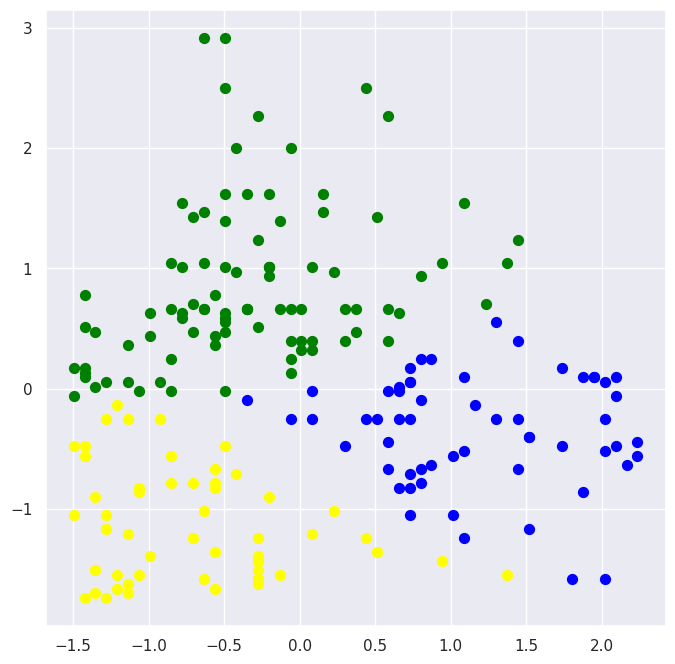

In [249]:
Q_scaled = scaler.transform(Q)  # Ensure scaling matches the previous scaler
plt.figure(figsize=(8, 8))
plt.scatter(Q_scaled[L == 0, 0], Q_scaled[L == 0, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(Q_scaled[L == 1, 0], Q_scaled[L == 1, 1], s=50, c='green', label='Cluster 2')
plt.scatter(Q_scaled[L == 2, 0], Q_scaled[L == 2, 1], s=50, c='yellow', label='Cluster 3')

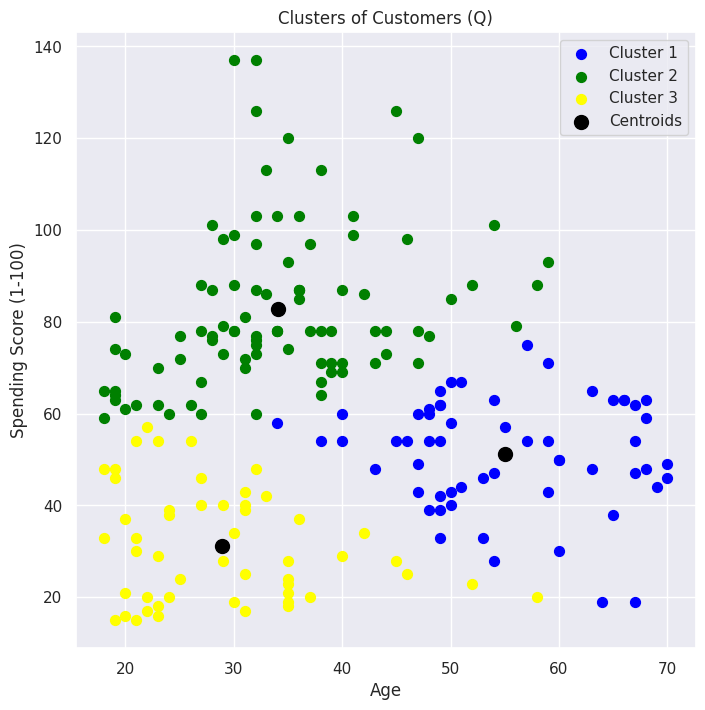

In [253]:
Q_scaled = scaler.transform(Q)  # Ensure scaling matches the previous scaler
plt.figure(figsize=(8, 8))
plt.scatter(Q[L == 0, 0], Q[L == 0, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(Q[L == 1, 0], Q[L == 1, 1], s=50, c='green', label='Cluster 2')
plt.scatter(Q[L == 2, 0], Q[L == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Clusters of Customers (Q)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [181]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

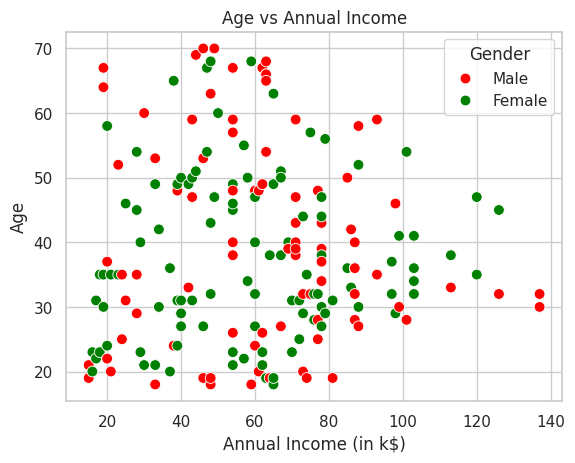

In [196]:
colors = ["red", "green"]

# scatterplot of the clusters
sns.scatterplot(
    x="Annual Income (k$)",
    y="Age",
    hue="Gender",
    palette=colors,
    legend="full",
    data=df,
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Age')
plt.title('Age vs Annual Income')
plt.show()

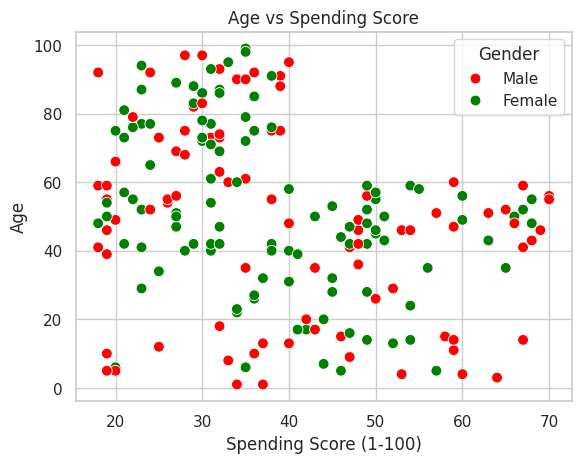

In [198]:
colors = ["red", "green"]

# scatterplot of the clusters
sns.scatterplot(
    x="Age",
    y="Spending Score (1-100)",
    hue="Gender",
    palette=colors,
    legend="full",
    data=df,
    s=60
)

plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.title('Age vs Spending Score')
plt.show()

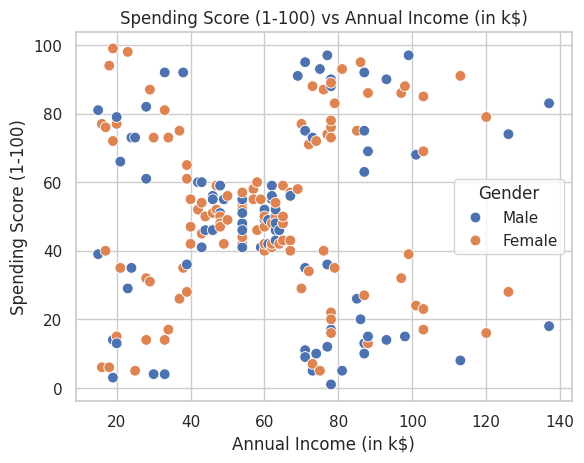

In [195]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]

# scatterplot of the clusters
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Gender",
    legend="full",
    data=df,
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()

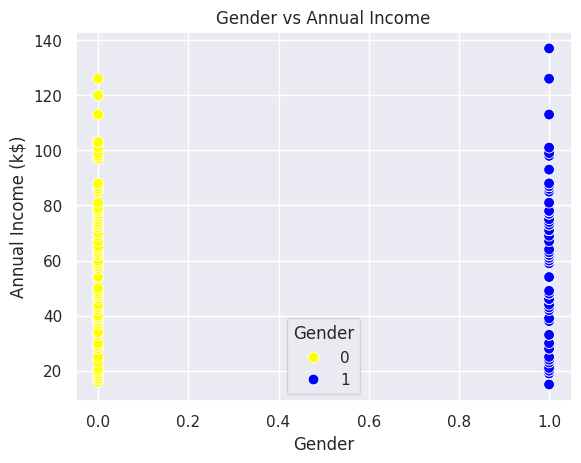

In [254]:
colors = ["yellow", "blue"]

# scatterplot of the clusters
sns.scatterplot(
    x="Gender",
    y="Annual Income (k$)",
    hue="Gender",
    palette=colors,
    legend="full",
    data=df,
    s=60
)

plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.title('Gender vs Annual Income')
plt.show()

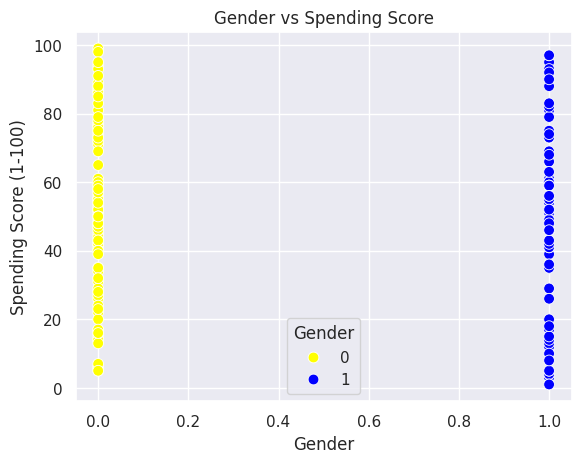

In [252]:
colors = ["yellow", "blue"]

# scatterplot of the clusters
sns.scatterplot(
    x="Gender",
    y="Spending Score (1-100)",
    hue="Gender",
    palette=colors,
    legend="full",
    data=df,
    s=60
)

plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Gender vs Spending Score')
plt.show()